In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
fp = './turkey_administrativelevels0_1_2/tur_polbnda_adm1.shp'

In [3]:
map_df = gpd.read_file(fp)

In [4]:
map_df.head()

,adm1_tr,adm1_en,adm1,Shape_Leng,Shape_Area,adm0_en,adm0_tr,adm0,geometry
0,ADANA,ADANA,TUR001,8.271786,1.407083,TURKEY,TÜRKİYE,TUR,"POLYGON ((36.31587 38.36376, 36.31769 38.36367..."
1,ADIYAMAN,ADIYAMAN,TUR002,5.494422,0.750561,TURKEY,TÜRKİYE,TUR,"POLYGON ((39.25297 38.18188, 39.25334 38.18159..."
2,AFYONKARAHİSAR,AFYONKARAHISAR,TUR003,7.149996,1.450064,TURKEY,TÜRKİYE,TUR,"POLYGON ((31.14797 39.26246, 31.15825 39.25753..."
3,AĞRI,AGRI,TUR004,6.588304,1.163170,TURKEY,TÜRKİYE,TUR,"POLYGON ((43.28706 40.01281, 43.29129 40.00884..."
4,AKSARAY,AKSARAY,TUR068,4.432509,0.790388,TURKEY,TÜRKİYE,TUR,"POLYGON ((33.96446 39.03804, 33.96453 39.03723..."


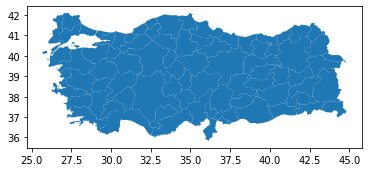

In [5]:
map_df.plot();

In [6]:
data = pd.read_csv("./data.csv")

In [7]:
data.head()

,city,total,first_,second_
0,adana,604533,355061,249472
1,adıyaman,134323,78503,55820
2,afyon,236602,135197,101405
3,ağrı,62582,42718,19864
4,amasya,151551,85487,66064


In [8]:
tr_population = pd.read_excel('./tr-pop.xls')

In [9]:
tr_population.head()

,Category,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Toplam-Total,64729501,65603160.0,66401851.0,67187251.0,68010215.0,68860539.0,69729967.0,70586256,71517100,...,74724269,75627384,76667864,77695904,78741053,79814871,80810525,82003882,83154997,83614362
1,Adana,1879695,1899324.0,1916637.0,1933428.0,1951142.0,1969512.0,1988277.0,2006650,2026319,...,2108805,2125635,2149260,2165595,2183167,2201670,2216475,2220125,2237940,2258718
2,Adıyaman,568432,571180.0,573149.0,574886.0,576808.0,578852.0,580926.0,582762,585067,...,593931,595261,597184,597835,602774,610484,615076,624513,626465,632459
3,Afyonkarahisar,696292,698029.0,698773.0,699193.0,699794.0,700502.0,701204.0,701572,697365,...,698626,703948,707123,706371,709015,714523,715693,725568,729483,736912
4,Ağrı,519190,521514.0,523123.0,524514.0,526070.0,527732.0,529417.0,530879,532180,...,555479,552404,551177,549435,547210,542255,536285,539657,536199,535435


In [10]:
df_city_populations = tr_population.iloc[1:, [0,21]] # Şehirleri ve 2020 nüfuslarını filtreleme
df_city_populations.columns = ['city', 2020] # Kategori isimlerini güncelleme

df_city_populations.city = df_city_populations.city.str.replace('İ', 'I')
df_city_populations.city = df_city_populations.city.str.replace('ı', 'i')

df_city_populations.city = df_city_populations.city.str.replace('Ğ', 'G')
df_city_populations.city = df_city_populations.city.str.replace('ğ', 'g')

df_city_populations.city = df_city_populations.city.str.replace('ü', 'u')
df_city_populations.city = df_city_populations.city.str.replace('Ü', 'U')

df_city_populations.city = df_city_populations.city.str.replace('ö', 'o')
df_city_populations.city = df_city_populations.city.str.replace('Ö', 'O')

df_city_populations.city = df_city_populations.city.str.replace('ş', 's')
df_city_populations.city = df_city_populations.city.str.replace('Ş', 'S')

df_city_populations.city = df_city_populations.city.str.replace('ç', 'c')
df_city_populations.city = df_city_populations.city.str.replace('Ç', 'C')

In [11]:
data.city = data.city.str.replace('İ', 'I')
data.city = data.city.str.replace('ı', 'i')

data.city = data.city.str.replace('Ğ', 'G')
data.city = data.city.str.replace('ğ', 'g')

data.city = data.city.str.replace('ü', 'u')
data.city = data.city.str.replace('Ü', 'U')

data.city = data.city.str.replace('ö', 'o')
data.city = data.city.str.replace('Ö', 'O')

data.city = data.city.str.replace('ş', 's')
data.city = data.city.str.replace('Ş', 'S')

data.city = data.city.str.replace('ç', 'c')
data.city = data.city.str.replace('Ç', 'C')

In [12]:
data.head()

,city,total,first_,second_
0,adana,604533,355061,249472
1,adiyaman,134323,78503,55820
2,afyon,236602,135197,101405
3,agri,62582,42718,19864
4,amasya,151551,85487,66064


In [13]:
df_city_populations.city = df_city_populations.city.str.upper() # Şehir isimlerini formatlama
data.city = data.city.str.upper() # Şehir isimlerini formatlama

In [14]:
data.city[data.city == 'AFYON'] = 'AFYONKARAHISAR'

In [15]:
for i,j in zip(df_city_populations.city, data.city):
    if i != j:
        print(i, j)

In [16]:
print(data.shape)
print(df_city_populations.shape)

(81, 4)
(81, 2)


In [17]:
df = data.merge(df_city_populations)

In [18]:
total_df = pd.DataFrame({'city': 'total', 'first_': df.iloc[:,1].sum(), 'second_': df.iloc[:,2].sum(), 2020: df.iloc[:,3].sum()}, index=[0])
total_df

,city,first_,second_,2020
0,total,25096402,14639833,10456569


In [19]:
df.head()

,city,total,first_,second_,2020
0,ADANA,604533,355061,249472,2258718
1,ADIYAMAN,134323,78503,55820,632459
2,AFYONKARAHISAR,236602,135197,101405,736912
3,AGRI,62582,42718,19864,535435
4,AMASYA,151551,85487,66064,335494


In [20]:
percentage = round((df['second_'] * 100) / df[2020], 2)

In [21]:
df['percentage'] = percentage

In [22]:
df

,city,total,first_,second_,2020,percentage
0,ADANA,604533,355061,249472,2258718,11.04
1,ADIYAMAN,134323,78503,55820,632459,8.83
2,AFYONKARAHISAR,236602,135197,101405,736912,13.76
3,AGRI,62582,42718,19864,535435,3.71
4,AMASYA,151551,85487,66064,335494,19.69
...,...,...,...,...,...,...
76,YALOVA,113178,65199,47979,276050,17.38
77,KARABUK,96532,55804,40728,243614,16.72
78,KILIS,30273,18172,12101,142792,8.47
79,OSMANIYE,164137,94696,69441,548556,12.66


In [23]:
asilananlar_df = df[['city', 'percentage']]

In [24]:
asilananlar_df.city = asilananlar_df.city.copy().str.upper()

In [25]:
asilananlar_df.head()

,city,percentage
0,ADANA,11.04
1,ADIYAMAN,8.83
2,AFYONKARAHISAR,13.76
3,AGRI,3.71
4,AMASYA,19.69


In [26]:
asilananlar_df.percentage.max()

22.31

In [27]:
# joining the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('adm1_en').join(asilananlar_df.set_index('city'))

#.head() returns the top 5(by default ) lines of the dataframe
merged.head()

,adm1_tr,adm1,Shape_Leng,Shape_Area,adm0_en,adm0_tr,adm0,geometry,percentage
adm1_en,,,,,,,,,
ADANA,ADANA,TUR001,8.271786,1.407083,TURKEY,TÜRKİYE,TUR,"POLYGON ((36.31587 38.36376, 36.31769 38.36367...",11.04
ADIYAMAN,ADIYAMAN,TUR002,5.494422,0.750561,TURKEY,TÜRKİYE,TUR,"POLYGON ((39.25297 38.18188, 39.25334 38.18159...",8.83
AFYONKARAHISAR,AFYONKARAHİSAR,TUR003,7.149996,1.450064,TURKEY,TÜRKİYE,TUR,"POLYGON ((31.14797 39.26246, 31.15825 39.25753...",13.76
AGRI,AĞRI,TUR004,6.588304,1.163170,TURKEY,TÜRKİYE,TUR,"POLYGON ((43.28706 40.01281, 43.29129 40.00884...",3.71
AKSARAY,AKSARAY,TUR068,4.432509,0.790388,TURKEY,TÜRKİYE,TUR,"POLYGON ((33.96446 39.03804, 33.96453 39.03723...",10.63


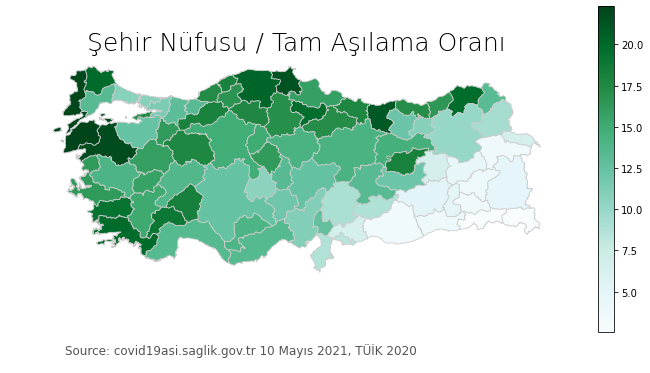

In [28]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'percentage'
# set the range for the choropleth

vmin, vmax = asilananlar_df.percentage.max(), asilananlar_df.percentage.min()
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(12, 6), facecolor=(1, 1, 1))

# remove the axis
ax.axis('off')

# add a title
ax.set_title('Şehir Nüfusu / Tam Aşılama Oranı', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: covid19asi.saglik.gov.tr 10 Mayıs 2021, TÜİK 2020',xy=(0.1, .08), xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add the colorbar to the figure
cbar = fig.colorbar(sm)

merged.plot(column=variable, cmap='BuGn', linewidth=0.8, ax=ax, edgecolor='0.8');

#saving our map as .png file.
fig.savefig('map_export.png', dpi=100)